# パーセプトロン
ディープラーニングの起源となるアルゴリズム。

パーセプトロンは、入力信号の総和が閾値を超えると1を出力、超えなければ0を出力する。
（閾値を超えて出力されることを、「ニューロンが発火する」ともいう。

$\theta$を閾値とすると、以下式で表される。

$$
y =
\begin{cases}
0 & w_1 x_1 + w_2 x_2 \leq \theta \\
1 & w_1 x_1 + w_2 x_2 + b > \theta \\
\end{cases}
$$

x1, x2が入力信号。
重みはw1, w2。
パーセプトロンは入力信号それぞれに固有の重みを持つ。

## 論理回路の実装

重み(w1, w2)と閾値(theta)を変えるだけで、AND回路、NAND回路、OR回路を切り替えられる。

#### AND回路

In [10]:
def AND(x, y):
    w1, w2, theta = (0.5, 0.5, 1.0)
    tmp = w1 * x + w2 * y
    if tmp <= theta:
        return 0
    else:
        return 1

print('AND:', (AND(0, 1)))

AND: 0


### バイアス(b)の導入

$ \theta $の代わりにバイアスbを導入

$$
y =
\begin{cases}
0 & w_1 x_1 + w_2 x_2 + b \leq 0 \\
1 & w_1 x_1 + w_2 x_2 + b > 0 \\
\end{cases}
$$

#### コード説明
- numpy配列では配列の要素数が同じ場合、要素同士が乗算される
- numpyのsum関数は要素の総和をとる

In [15]:
import numpy as np

x = np.array([0, 1.0])
w = np.array([0.5, 0.5])
b = -0.7

print('x*w', x*w)
print('sum(x*w)', np.sum(x*w))
print('sum(x*w)+b', np.sum(x*w)+b)


x*w [0.  0.5]
sum(x*w) 0.5
sum(x*w)+b -0.19999999999999996


#### NAND回路

In [18]:
def NAND(x, y):
    x = np.array([x, y])
    w = np.array([-0.5, -0.5])
    b = 0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    elif tmp > 0:
        return 1

print('NAND(1, 0):', NAND(1,0))
print('NAND(1, 1):', NAND(1,1))

NAND(1, 0): 1
NAND(1, 1): 0


#### OR回路

In [20]:
def OR(x, y):
    x = np.array([x, y])
    w = np.array([0.5, 0.5])
    b = 0
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    elif tmp > 0:
        return 1

print('OR(1, 0):', OR(1,0))
print('OR(0,0):', OR(0,0))

OR(1, 0): 1
OR(0,0): 0


# 2.4パーセプトロンの限界
## 2.4.1 XORゲート
パーセプトロンではXORゲートを実現することができない。


### 排他的論理和

XORゲート：排他的論理和
入力信号$x_1$, $x_2$のどちらかが1のときだけ出力が1になる。

|$x_1$| $x_2$ | $y$ |
| ---- | ---- | ---- |
| 0 | 0 | 0 |
| 1 | 0 | 1 |
| 0 | 1 | 1 |
| 1 | 1 | 0 |

### パーセプトロンで排他的論理和を実現できない理由

ORゲートを座標上に直線で表してみる。
ORゲートは、入力値のどちらかが1であれば1を出力するゲートで、  
たとえば重みパラメータ$(b, w_1, w_2)=(-0.5, 1.0, 1.0)$で表せられる。  
これを式で表すと下のようになる。

$$
y =
\begin{cases}
0 & -0.5 + x_1 + x_2 \leq 0 \\
1 & -0.5 + x_1 + x_2 > 0 \\
\end{cases}
$$

$ -0.5 + x_1 + x_2 = 0 $ の直線をグラフで表してみる。

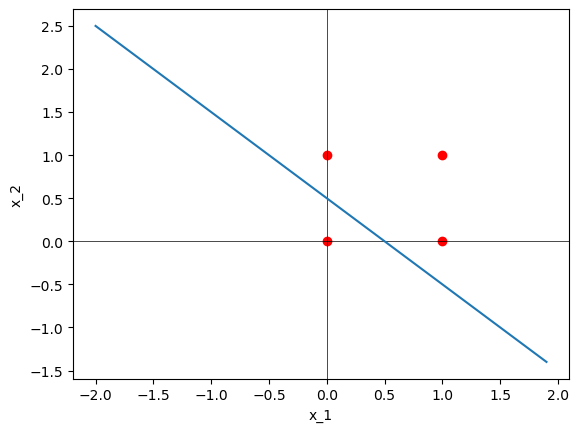

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def OR(x):
    return -x + 0.5

x_1 = np.arange(-2, 2, 0.1)
x_2 = OR(x_1)

plt.xlabel('x_1')
plt.ylabel('x_2')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.scatter([0, 1, 1, 0], [0, 1, 0, 1], color='red')
plt.plot(x_1, x_2)
plt.show()

上グラフのように、0を出力する入力(0, 0)と、1を出力する(0, 0)以外を区切ることができている。

XORゲートの場合はどうか。

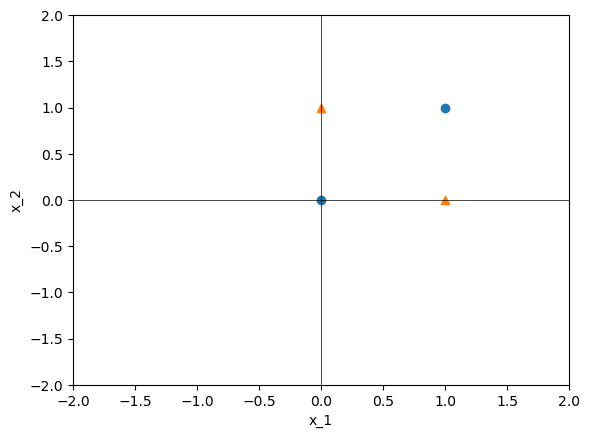

In [10]:
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.scatter([0, 1], [0, 1], marker='o')
plt.scatter([0, 1], [1, 0], marker='^')
plt.show()

上の◯と△を分ける直線は引くことができない。

## 2.5 多層パーセプトロン
XORゲートを一つのパーセプトロンで表すことはできなかったが、複数のパーセプトロン（層を重ねること）で表現できる。

### 既存ゲートを組み合わせてXORゲートを作ってみる
